In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
train_df = pd.read_parquet('train.parquet')
test_df = pd.read_parquet('test.parquet')

In [3]:
labe_df = pd.read_parquet('label.parquet')

In [4]:
train_df.S_2 = pd.to_datetime(train_df.S_2)
test_df.S_2 = pd.to_datetime(test_df.S_2)

In [5]:
cat_features = ["B_30","B_38","D_114","D_116","D_117","D_120","D_126","D_63","D_64","D_66","D_68"]
num_cols = [x for x in train_df.columns if (x not in cat_features) & (x not in ['customer_ID','S_2'])]

In [6]:
train_date = train_df.groupby('customer_ID')['S_2'].agg(['first','last','count'])
train_date['all_trade_date'] = (train_date['last']-train_date['first']).dt.days

In [7]:
train_date = train_date.merge(labe_df,on='customer_ID',how='left')

In [54]:
train_date

,customer_ID,first,last,count,all_trade_date,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,2018-03-13,13,369,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2017-03-01,2018-03-25,13,389,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2017-03-11,2018-03-12,13,366,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2017-03-31,2018-03-29,13,363,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2017-03-30,2018-03-30,13,365,0
...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2017-03-20,2018-03-31,13,376,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,2017-03-22,2018-03-22,13,365,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2017-03-16,2018-03-07,13,356,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-03-25,2018-03-23,13,363,1


In [81]:
a=train_date.groupby(['count']).count()

In [82]:
a

,customer_ID,first,last,all_trade_date,target
count,,,,,
1,5120,5120,5120,5120,5120
2,6098,6098,6098,6098,6098
3,5778,5778,5778,5778,5778
4,4673,4673,4673,4673,4673
5,4671,4671,4671,4671,4671
6,5515,5515,5515,5515,5515
7,5198,5198,5198,5198,5198
8,6110,6110,6110,6110,6110
9,6411,6411,6411,6411,6411


In [118]:
b=train_date[['count','target']].groupby(['count','target'])['target'].count().to_frame().rename(columns={'target':'number'}).reset_index()
b=b.rename(columns={
    'count':'used_time',
    'number':'count'
})
b

,used_time,target,count
0,1,0,3401
1,1,1,1719
2,2,0,4156
3,2,1,1942
4,3,0,3706
5,3,1,2072
6,4,0,2728
7,4,1,1945
8,5,0,2837
9,5,1,1834


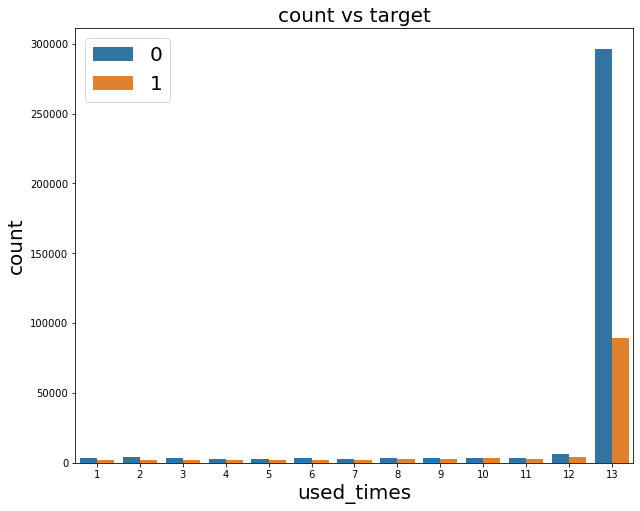

In [124]:
plt.figure(figsize=(10,8))
sns.barplot(x='used_time',y='count',hue='target',data=b)
plt.legend(loc='upper left',fontsize=20)
plt.title('count vs target',fontsize=20)
plt.xlabel('used_times',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

In [36]:
gg= train_date.loc[:,'all_trade_date'].value_counts()

In [38]:
gg.max()

76649

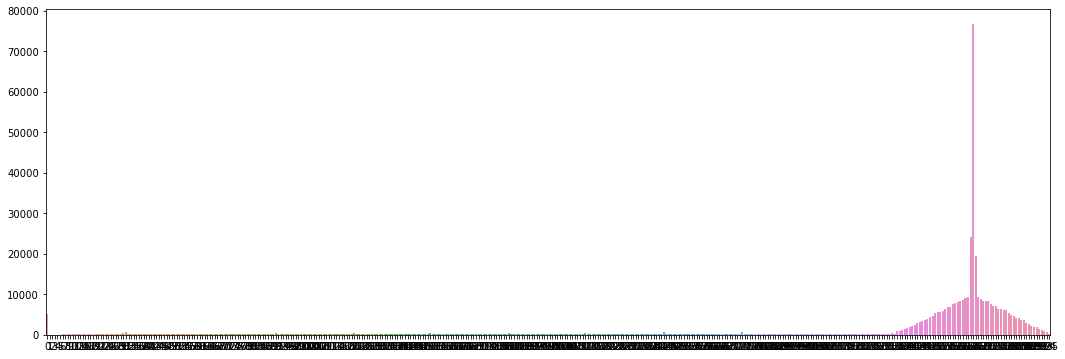

In [37]:
plt.figure(figsize=(18,6))
sns.barplot(x=gg.index,y=gg.values)
plt.show()

In [39]:
test_date = test_df.groupby('customer_ID')['S_2'].agg(['first','last'])
test_date['all_trade_date'] = (test_date['last']-test_date['first']).dt.days

In [44]:
kk= test_date.loc[:,'all_trade_date'].value_counts()

In [45]:
kk.max()

116084

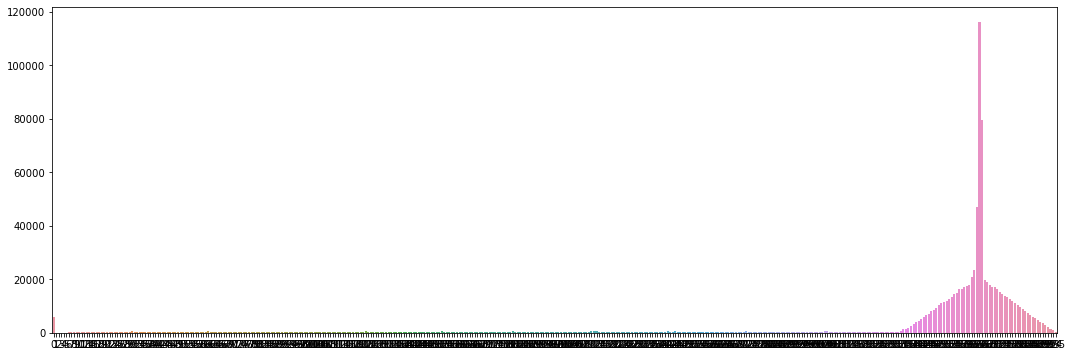

In [46]:
plt.figure(figsize=(18,6))
sns.barplot(x=kk.index,y=kk.values)
plt.show()

In [125]:
#test的使用期間
kk.sort_index()

0      5827
1        24
2        41
3        62
4        80
       ... 
391    2942
392    2228
393    1511
394     881
395     306
Name: all_trade_date, Length: 396, dtype: int64

In [ ]:
超過365 1
不滿365 0

In [128]:
#train的使用期間
train_date['all_trade_date'].value_counts().sort_index()

0      5120
1        16
2        29
3        57
4        56
       ... 
391    1546
392    1244
393     880
394     602
395     261
Name: all_trade_date, Length: 396, dtype: int64

In [139]:
#超過365跟沒超過365的0跟1分布
z=train_date[['all_trade_date','target']].groupby(['all_trade_date','target'])['target'].count().to_frame().rename(columns={'target':'count'}).reset_index()
z.loc[z['all_trade_date']>365,:]
# z.loc[z['all_trade_date']<365,:]

,all_trade_date,target,count
732,366,0,15583
733,366,1,3834
734,367,0,6808
735,367,1,2475
736,368,0,6526
737,368,1,2273
738,369,0,6242
739,369,1,2134
740,370,0,6285
741,370,1,2063


In [163]:
def pct(arr):
    return arr.values[0]/arr.values[-1]
_=z.loc[z['all_trade_date']>365,:].groupby('all_trade_date').agg(pct)
_['count'].to_frame().mean()

count    3.053714
dtype: float64

In [191]:
__=z.loc[z['all_trade_date']<365,:].groupby('all_trade_date').agg(pct)
__['count'].to_frame()['count'].mean()

1.471811487058543

In [232]:
#小於多少天 正常繳費是違約的多少倍  數字越小 違約比率越高
def month_vs_defult(day):
    def pct(arr):
        return arr.values[0]/arr.values[-1]
    _=z.loc[z['all_trade_date'] < day,:].groupby('all_trade_date').agg(pct)
    small = _['count'].to_frame()['count'].mean()
    _=z.loc[z['all_trade_date'] > day,:].groupby('all_trade_date').agg(pct)
    big = _['count'].to_frame()['count'].mean()
    return small,big
    print(f'{day}天以下 正常繳費人數 是 違約人數 的{small}倍''\n'f'{day}天以上 正常繳費人數 是 違約人數 的{big}倍')

In [233]:
month_vs_defult(365)

(1.471811487058543, 3.053714240587338)

In [319]:
test_day = [30,60,90,120,180,210,240,270,300,330,365]
for_plot = pd.DataFrame(columns=['day','target','vales'])
diction={}
for day in test_day:
    lower,upper = month_vs_defult(day)
    diction[day]={'lower':lower,'upper':upper}
    
a=pd.concat({i:pd.Series(j) for i,j in diction.items()})
a.columns=['day','target','vales']

In [320]:
a=a.to_frame().reset_index()

In [321]:
a=a.rename(columns={'level_0':'day','level_1':'target',0:'values'})

In [322]:
a

,day,target,values
0,30,lower,2.080201
1,30,upper,1.560174
2,60,lower,2.038671
3,60,upper,1.522637
4,90,lower,1.837672
5,90,upper,1.530426
6,120,lower,1.729727
7,120,upper,1.544975
8,180,lower,1.596955
9,180,upper,1.605200


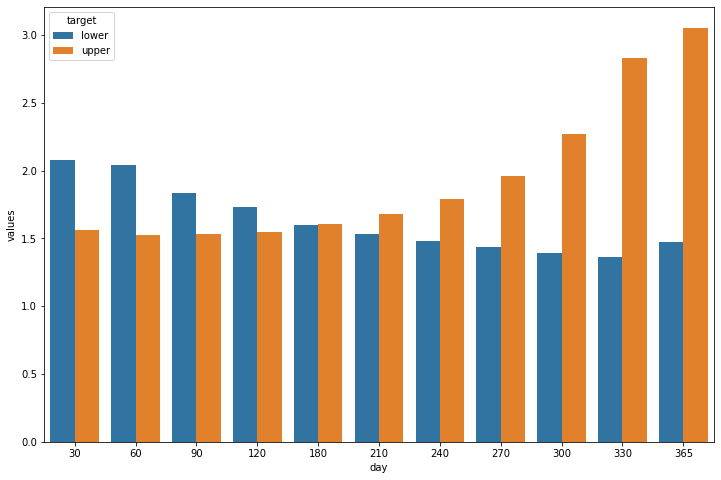

In [325]:
plt.figure(figsize=(12,8))
sns.barplot(x='day',y='values',hue='target',data=a)
plt.show()

In [301]:
diction

{30: {'lower': 2.0802013943125117, 'upper': 1.5601737983692445},
 60: {'lower': 2.0386709107931185, 'upper': 1.5226365480802175},
 90: {'lower': 1.8376720018783121, 'upper': 1.530425845970012},
 120: {'lower': 1.7297265953990928, 'upper': 1.544975083331923},
 180: {'lower': 1.5969552534043905, 'upper': 1.605200042493002},
 210: {'lower': 1.5349627116541908, 'upper': 1.68016405083227},
 240: {'lower': 1.4812361580508404, 'upper': 1.7887717785741246},
 270: {'lower': 1.4371554124059551, 'upper': 1.9608843667738427},
 300: {'lower': 1.3913628331455987, 'upper': 2.271749821160361},
 330: {'lower': 1.3615446399683342, 'upper': 2.8325176265787415},
 365: {'lower': 1.471811487058543, 'upper': 3.053714240587338}}

In [264]:
data = {30:{'lower':10,'upper':13}}
d = pd.concat({k:pd.Series(v) for k,v in data.items()})
d.columns=['day','target','vales']

In [265]:
d

30  lower    10
    upper    13
dtype: int64

In [261]:
data.items()

dict_items([(30, {'lower': 10, 'upper': 13})])

In [335]:
z=train_df.groupby('customer_ID')['S_2'].agg(['first','last'])
z['total_used_pariod'] = (z['last']-z['first']).dt.days.sort_index()
z=z[['total_used_pariod']]
z

,total_used_pariod
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,369
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,389
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,366
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,363
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,365
...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,376
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,365
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,356


In [11]:
train_df.S_2 = pd.to_datetime(train_df.S_2)

In [21]:
(train_df.groupby('customer_ID')['S_2'].nth(-2).to_frame())["S_2"].dt.month.unique()

array([ 2, 12, 11,  1,  5,  3,  8,  9,  4, 10,  6,  7], dtype=int64)

In [18]:
test_df.S_2 = pd.to_datetime(test_df.S_2)

In [23]:
(test_df.groupby('customer_ID')['S_2'].nth(-2).to_frame())["S_2"].dt.month.unique()

array([ 9,  3,  2, 12,  1,  8,  7,  6, 10, 11,  4,  5], dtype=int64)

In [64]:
p=train_df.groupby('customer_ID')['S_2'].count().to_frame()
p

,S_2
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,13
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,13
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,13
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,13
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,13
...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,13
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,13
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,13


In [65]:
p.loc[p['S_2'] <=2,:]

,S_2
customer_ID,
0005ef1480ffe4f0e5908eae07db8e05f2e705bca6a57db3b97d1da2eb6c7cab,2
0009bd8871169b8d76a445e1f52079a6edc0b6f0bf021d5ec50ef6aa6487cc14,1
000eee12732c9c7b790870c556bc33339d6d17725cbeb4a7da6b2a5d2c8386aa,1
0015d621bacbfd59cc1479aea405645ecb480f6ee779e06d66ce55da3bd397fd,1
00163cf7b8cc9cb2781ac05331d83c3ae7720f4860ee8aa2a3f0fb70b13f2f25,1
...,...
fff845a9c5e9206a7f783640085531e10d6a9e54c2f1ccdeb3d2f98480027079,1
fffb0971619564cf6a4c01cf3014e42718555728b2988ec3340c37d64db23ca1,1
fffd4c8532e6746a53dfdd52de2219c847ddb0123c27ccb64cefd5291be2ed35,2


In [66]:
p['last2'] = 0
p.loc[p['S_2'] <=2,'last2'] = 0

In [67]:
p[p['S_2'] > 2]['S_2'].unique()

array([13,  3,  4,  9, 12,  8, 10,  7,  6, 11,  5], dtype=int64)

In [68]:
p.loc[p['S_2'] <= 2,:]

,S_2,last2
customer_ID,,
0005ef1480ffe4f0e5908eae07db8e05f2e705bca6a57db3b97d1da2eb6c7cab,2,0
0009bd8871169b8d76a445e1f52079a6edc0b6f0bf021d5ec50ef6aa6487cc14,1,0
000eee12732c9c7b790870c556bc33339d6d17725cbeb4a7da6b2a5d2c8386aa,1,0
0015d621bacbfd59cc1479aea405645ecb480f6ee779e06d66ce55da3bd397fd,1,0
00163cf7b8cc9cb2781ac05331d83c3ae7720f4860ee8aa2a3f0fb70b13f2f25,1,0
...,...,...
fff845a9c5e9206a7f783640085531e10d6a9e54c2f1ccdeb3d2f98480027079,1,0
fffb0971619564cf6a4c01cf3014e42718555728b2988ec3340c37d64db23ca1,1,0
fffd4c8532e6746a53dfdd52de2219c847ddb0123c27ccb64cefd5291be2ed35,2,0


In [69]:
p[p['S_2'] > 2]

,S_2,last2
customer_ID,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,13,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,13,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,13,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,13,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,13,0
...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,13,0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,13,0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,13,0


In [73]:
(train_df.groupby('customer_ID')['S_2'].nth(-1).to_frame())['S_2'].dt.month

customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    3
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5    3
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1    3
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc    3
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed    3
                                                                   ..
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7    3
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286    3
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6    3
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145b2c3d01967fcce461    3
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681    3
Name: S_2, Length: 458913, dtype: int64

In [117]:
train_df_smaller_3=train_df[train_df['S_2']<='2018-02']

In [118]:
train_df_smaller_3.insert(2,column='month',value=train_df_smaller_3['S_2'].dt.month)

In [119]:
train_df_smaller_3

,customer_ID,S_2,month,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,3,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,...,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,4,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,...,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,5,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,...,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,6,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,...,-1,-1,-1,0,0,0.0,NaN,0,0.006527,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,7,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,...,-1,-1,-1,0,0,0.0,NaN,0,0.008126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531444,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-09-20,9,0.973780,8,0.046246,0.732382,0.007093,0.081627,0.0,...,-1,-1,-1,0,0,0.0,NaN,0,0.004599,0
5531445,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-10-20,10,0.979511,0,0.022695,0.557029,0.008897,0.091565,0.0,...,-1,-1,-1,0,0,0.0,NaN,0,0.003811,0
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,11,0.979333,14,0.020818,0.828199,0.003487,0.090743,0.0,...,-1,-1,-1,0,0,0.0,NaN,0,0.001498,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,12,0.984907,10,0.007209,0.812610,0.005904,0.079886,0.0,...,-1,-1,-1,0,0,0.0,NaN,0,0.008225,0


In [120]:
t=train_df_smaller_3.groupby('customer_ID')['S_2'].nth(-1).to_frame()
t = t["S_2"].dt.to_period("M").to_frame()
t=t.rename(columns={'S_2':'Last_month'})
t

,Last_month
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-01
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-01
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-01
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-01
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-01
...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,2018-01
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,2018-01
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,2018-01


In [121]:
train_df_smaller_3 = train_df_smaller_3.set_index('customer_ID')

In [122]:
train_df_smaller_3 = train_df_smaller_3.merge(t,on='customer_ID',how='left')

In [128]:
train_df_smaller_3 = train_df_smaller_3.reset_index()
train_df_smaller_3

,customer_ID,S_2,month,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,Last_month
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,3,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,...,-1,-1,0,0,0.0,NaN,0,0.000610,0,2018-01
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,4,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,...,-1,-1,0,0,0.0,NaN,0,0.005492,0,2018-01
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,5,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,...,-1,-1,0,0,0.0,NaN,0,0.006986,0,2018-01
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,6,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,...,-1,-1,0,0,0.0,NaN,0,0.006527,0,2018-01
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,7,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,...,-1,-1,0,0,0.0,NaN,0,0.008126,0,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632255,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-09-20,9,0.973780,8,0.046246,0.732382,0.007093,0.081627,0.0,...,-1,-1,0,0,0.0,NaN,0,0.004599,0,2018-01
4632256,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-10-20,10,0.979511,0,0.022695,0.557029,0.008897,0.091565,0.0,...,-1,-1,0,0,0.0,NaN,0,0.003811,0,2018-01
4632257,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,11,0.979333,14,0.020818,0.828199,0.003487,0.090743,0.0,...,-1,-1,0,0,0.0,NaN,0,0.001498,0,2018-01
4632258,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,12,0.984907,10,0.007209,0.812610,0.005904,0.079886,0.0,...,-1,-1,0,0,0.0,NaN,0,0.008225,0,2018-01


In [151]:
train_df_smaller_3

,customer_ID,S_2,month,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,Last_month
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,3,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,...,-1,-1,0,0,0.0,NaN,0,0.000610,0,2018-01
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,4,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,...,-1,-1,0,0,0.0,NaN,0,0.005492,0,2018-01
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,5,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,...,-1,-1,0,0,0.0,NaN,0,0.006986,0,2018-01
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,6,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,...,-1,-1,0,0,0.0,NaN,0,0.006527,0,2018-01
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,7,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,...,-1,-1,0,0,0.0,NaN,0,0.008126,0,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632255,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-09-20,9,0.973780,8,0.046246,0.732382,0.007093,0.081627,0.0,...,-1,-1,0,0,0.0,NaN,0,0.004599,0,2018-01
4632256,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-10-20,10,0.979511,0,0.022695,0.557029,0.008897,0.091565,0.0,...,-1,-1,0,0,0.0,NaN,0,0.003811,0,2018-01
4632257,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,11,0.979333,14,0.020818,0.828199,0.003487,0.090743,0.0,...,-1,-1,0,0,0.0,NaN,0,0.001498,0,2018-01
4632258,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,12,0.984907,10,0.007209,0.812610,0.005904,0.079886,0.0,...,-1,-1,0,0,0.0,NaN,0,0.008225,0,2018-01


In [152]:
last_time = train_df_smaller_3['Last_month'].unique()

In [172]:
last_time_tans=[]
for i in last_time:
    last_time_tans.append(str(i))

In [176]:
last_time_tans

['2018-01',
 '2018-02',
 '2017-12',
 '2017-05',
 '2017-11',
 '2017-09',
 '2017-03',
 '2017-06',
 '2017-08',
 '2017-04',
 '2017-10',
 '2017-07']

In [183]:
_ = train_df_smaller_3.loc[train_df_smaller_3['Last_month'] == last_time[-1],:]

In [184]:
_

,customer_ID,S_2,month,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,Last_month
235403,0d1701f0f7edd6350a4bdffcf2408159ee6e2fc52979b7...,2017-06-12,6,0.788624,3,0.565885,0.816016,0.009152,0.120471,0.0,...,-1,-1,0,0,0.0,NaN,0,0.003858,0,2017-07
235404,0d1701f0f7edd6350a4bdffcf2408159ee6e2fc52979b7...,2017-07-26,7,0.832560,0,0.007844,1.001486,0.007045,0.098497,0.0,...,-1,-1,0,0,0.0,NaN,0,0.003635,0,2017-07
456941,19654ea53b4ddda8cf1c1d27eede968800b7a9724c77a9...,2017-05-20,5,NaN,0,0.000644,1.009040,0.003506,NaN,0.0,...,-1,-1,-1,0,NaN,NaN,-1,0.005932,-1,2017-07
456942,19654ea53b4ddda8cf1c1d27eede968800b7a9724c77a9...,2017-06-19,6,NaN,0,0.007122,1.009913,0.007008,NaN,0.0,...,-1,-1,-1,0,NaN,NaN,-1,0.003926,-1,2017-07
456943,19654ea53b4ddda8cf1c1d27eede968800b7a9724c77a9...,2017-07-25,7,NaN,0,0.003770,1.007262,0.006656,NaN,0.0,...,-1,-1,-1,-1,NaN,NaN,-1,NaN,-1,2017-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060132,e0274507d31800f115b37790f303ad5f4223fc3ef1818e...,2017-05-09,5,NaN,0,0.004224,0.816985,0.000503,NaN,0.0,...,-1,-1,-1,0,NaN,NaN,-1,0.009031,-1,2017-07
4060133,e0274507d31800f115b37790f303ad5f4223fc3ef1818e...,2017-06-08,6,NaN,0,0.009072,0.815062,0.000425,NaN,0.0,...,-1,-1,-1,0,NaN,NaN,-1,0.000403,-1,2017-07
4060134,e0274507d31800f115b37790f303ad5f4223fc3ef1818e...,2017-07-08,7,NaN,0,0.010060,0.811537,0.002750,NaN,0.0,...,-1,-1,-1,-1,NaN,NaN,-1,NaN,-1,2017-07
4314820,ee52185d851d6d7f36ed0b072384c8591ef1292ddadc40...,2017-07-27,7,NaN,0,0.004128,0.818614,0.005958,0.176459,0.0,...,-1,-1,-1,-1,NaN,NaN,-1,NaN,-1,2017-07


In [185]:
before_ = _.loc[_['S_2'] < '2018-02',:].groupby('customer_ID').agg('mean').sort_index()
after_ = _.loc[_['S_2'] >= '2018-02',:].groupby('customer_ID').agg('mean').sort_index()

In [187]:
after_

,month,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,


In [189]:
def last_2_mean(arr):
    return arr.values[-2:].mean()-arr.values[:-2].mean()
train_df.groupby('customer_ID')['S_2'].count().to_frame()

customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5    13
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1    13
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc    13
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed    13
                                                                    ..
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7    13
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286    13
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6    13
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145b2c3d01967fcce461    13
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681    13
Name: S_2, Length: 458913, dtype: int64

In [44]:
_=train_df.groupby('customer_ID')['S_2'].count().to_frame()
_.columns=['count']
train_df_test = train_df.merge(_,on='customer_ID',how='left').drop('S_2',axis=1)

In [52]:
train_df_test[num_cols]

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,NaN,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,NaN,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
2,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,NaN,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0
3,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,0.005531,NaN,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.006527,0
4,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,0.009312,NaN,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.008126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,0.979333,14,0.020818,0.828199,0.003487,0.090743,0.0,0.025139,NaN,0.014225,...,-1,-1,-1,0,0,0.0,NaN,0,0.001498,0
5531447,0.984907,10,0.007209,0.812610,0.005904,0.079886,0.0,0.023691,NaN,0.009467,...,-1,-1,-1,0,0,0.0,NaN,0,0.008225,0
5531448,0.983019,15,0.013151,0.815422,0.003457,0.100503,0.0,0.012343,NaN,0.006591,...,-1,-1,-1,0,0,0.0,NaN,0,0.006773,0
5531449,0.969861,15,0.009855,1.003541,0.005117,0.101802,0.0,0.008578,NaN,0.014235,...,-1,-1,-1,0,0,0.0,NaN,0,0.001168,0


In [99]:
def last_2_mean(arr):
    return arr.values[-2]-np.mean(arr[:-2])

train_df_test.loc[train_df_test['count'] > 2,:].groupby('customer_ID')[num_cols].apply(last_2_mean)

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.003929,-0.272727,0.008304,0.003747,-0.004111,-0.009178,0.000000,0.001154,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.000949,0.000000
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,-0.024624,11.727273,0.010535,0.016816,0.001153,0.046529,0.000000,0.003294,NaN,-0.115837,...,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,-0.001939,0.000000
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,-0.012993,0.000000,0.004280,0.003298,0.000132,NaN,0.000000,-0.001067,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.002024,0.000000
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.028716,-1.818182,-0.053706,0.064339,-0.001873,0.077502,0.000000,-0.001446,NaN,-0.008851,...,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.000127,0.000000
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,-0.015370,0.000000,0.002975,-0.001268,0.001156,NaN,0.000000,-0.001190,NaN,-0.013220,...,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.002355,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,-0.039995,-3.181818,-0.014377,-0.001684,0.001511,0.011644,0.000000,0.004512,NaN,-0.066642,...,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,-0.000873,0.000000
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,-0.024878,-1.272727,-0.074826,0.012576,0.002110,NaN,0.000000,-0.047294,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.004559,0.000000
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.001209,0.818182,-0.031324,0.173714,0.003620,-0.017042,-0.214184,-0.066697,NaN,-0.082491,...,0.0,0.0,0.0,0.090909,0.0,0.000000,NaN,0.090909,0.002790,0.090909
